# Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [3]:
# Read with pandas the data we just configured in the previous step
df = pd.read_csv("/workspaces/EDA_4/data/processed/conditions_per_state.csv")
df.head()

,STATE_NAME,Physicians/10000,Primary Care Physicians/10000,Patient Care Primary Care Physicians/10000,General Surgeons/10000,Patient Care General Surgeons/10000,Median_Household_Income_2018,Percent of Population Aged 60+,anycondition_prevalence,Obesity_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence,Heart disease_prevalence
0,Alabama,217.1,77.2,71.2,7.6,6.9,43479.820896,23.861194,53.026866,38.273134,10.679104,16.232836,3.858209,9.616418
1,Alaska,276.9,112.8,105.6,9.6,8.5,64079.000000,17.985185,42.403704,32.048148,8.188889,11.970370,3.181481,7.448148
2,Arizona,242.0,78.1,73.2,6.9,6.1,49105.866667,26.046667,45.293333,32.160000,8.940000,13.040000,3.973333,9.000000
3,Arkansas,207.6,79.9,75.0,7.0,6.5,41801.373333,25.332000,50.680000,36.868000,10.697333,14.882667,3.789333,10.230667
4,California,279.6,96.2,87.1,7.2,6.2,67098.655172,23.184483,38.218966,27.813793,6.922414,11.325862,3.246552,6.901724


In [4]:
# First look at the distribution on a table
df.describe()

,Physicians/10000,Primary Care Physicians/10000,Patient Care Primary Care Physicians/10000,General Surgeons/10000,Patient Care General Surgeons/10000,Median_Household_Income_2018,Percent of Population Aged 60+,anycondition_prevalence,Obesity_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence,Heart disease_prevalence
count,51.000000,51.00000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,282.386275,96.25098,86.760784,8.433333,7.345098,56443.872578,24.697500,44.583153,33.285587,8.558842,12.423432,3.354261,8.204475
std,97.435887,26.09765,19.151492,2.867380,1.789672,10266.643889,2.434465,5.453419,3.976526,1.816070,1.930684,0.337174,1.230267
min,191.300000,65.30000,61.200000,5.600000,5.000000,39932.719512,16.800000,32.000000,24.640000,4.900000,8.100000,2.600000,4.100000
25%,230.150000,80.20000,75.400000,7.000000,6.200000,48898.753333,23.502559,40.771543,31.246429,7.379060,11.189122,3.153101,7.422925
50%,263.400000,91.50000,83.700000,7.700000,6.900000,55861.895522,24.933333,45.200000,33.529167,8.286667,12.300000,3.320000,8.175000
75%,303.050000,102.85000,92.700000,9.500000,8.050000,60857.734820,26.046061,47.926481,36.248925,9.913853,13.873764,3.591258,8.902941
max,847.000000,239.70000,179.400000,25.300000,15.200000,82533.000000,28.544444,55.930909,40.997561,13.781818,16.304878,4.009091,11.181818


# Distribution Plot

In this section, we will provide a visual representation of all the predictors and targets in our dataset, building upon the exploratory data analysis (EDA) that we conducted earlier. This visualization aims to showcase key statistical measures such as mode, mean, and standard deviation, offering a more detailed and comprehensive understanding of our data distribution. As part of this process, we have omitted the state name variable from consideration. Given its categorical nature and lack of relevance to our current study, excluding this variable streamlines our focus on more meaningful aspects of the dataset.

In [5]:
# We drop the state name for this purpose yet it's distriburtion would make no sense
df.drop('STATE_NAME', axis= 1, inplace= True)
df.head()

,Physicians/10000,Primary Care Physicians/10000,Patient Care Primary Care Physicians/10000,General Surgeons/10000,Patient Care General Surgeons/10000,Median_Household_Income_2018,Percent of Population Aged 60+,anycondition_prevalence,Obesity_prevalence,COPD_prevalence,diabetes_prevalence,CKD_prevalence,Heart disease_prevalence
0,217.1,77.2,71.2,7.6,6.9,43479.820896,23.861194,53.026866,38.273134,10.679104,16.232836,3.858209,9.616418
1,276.9,112.8,105.6,9.6,8.5,64079.000000,17.985185,42.403704,32.048148,8.188889,11.970370,3.181481,7.448148
2,242.0,78.1,73.2,6.9,6.1,49105.866667,26.046667,45.293333,32.160000,8.940000,13.040000,3.973333,9.000000
3,207.6,79.9,75.0,7.0,6.5,41801.373333,25.332000,50.680000,36.868000,10.697333,14.882667,3.789333,10.230667
4,279.6,96.2,87.1,7.2,6.2,67098.655172,23.184483,38.218966,27.813793,6.922414,11.325862,3.246552,6.901724


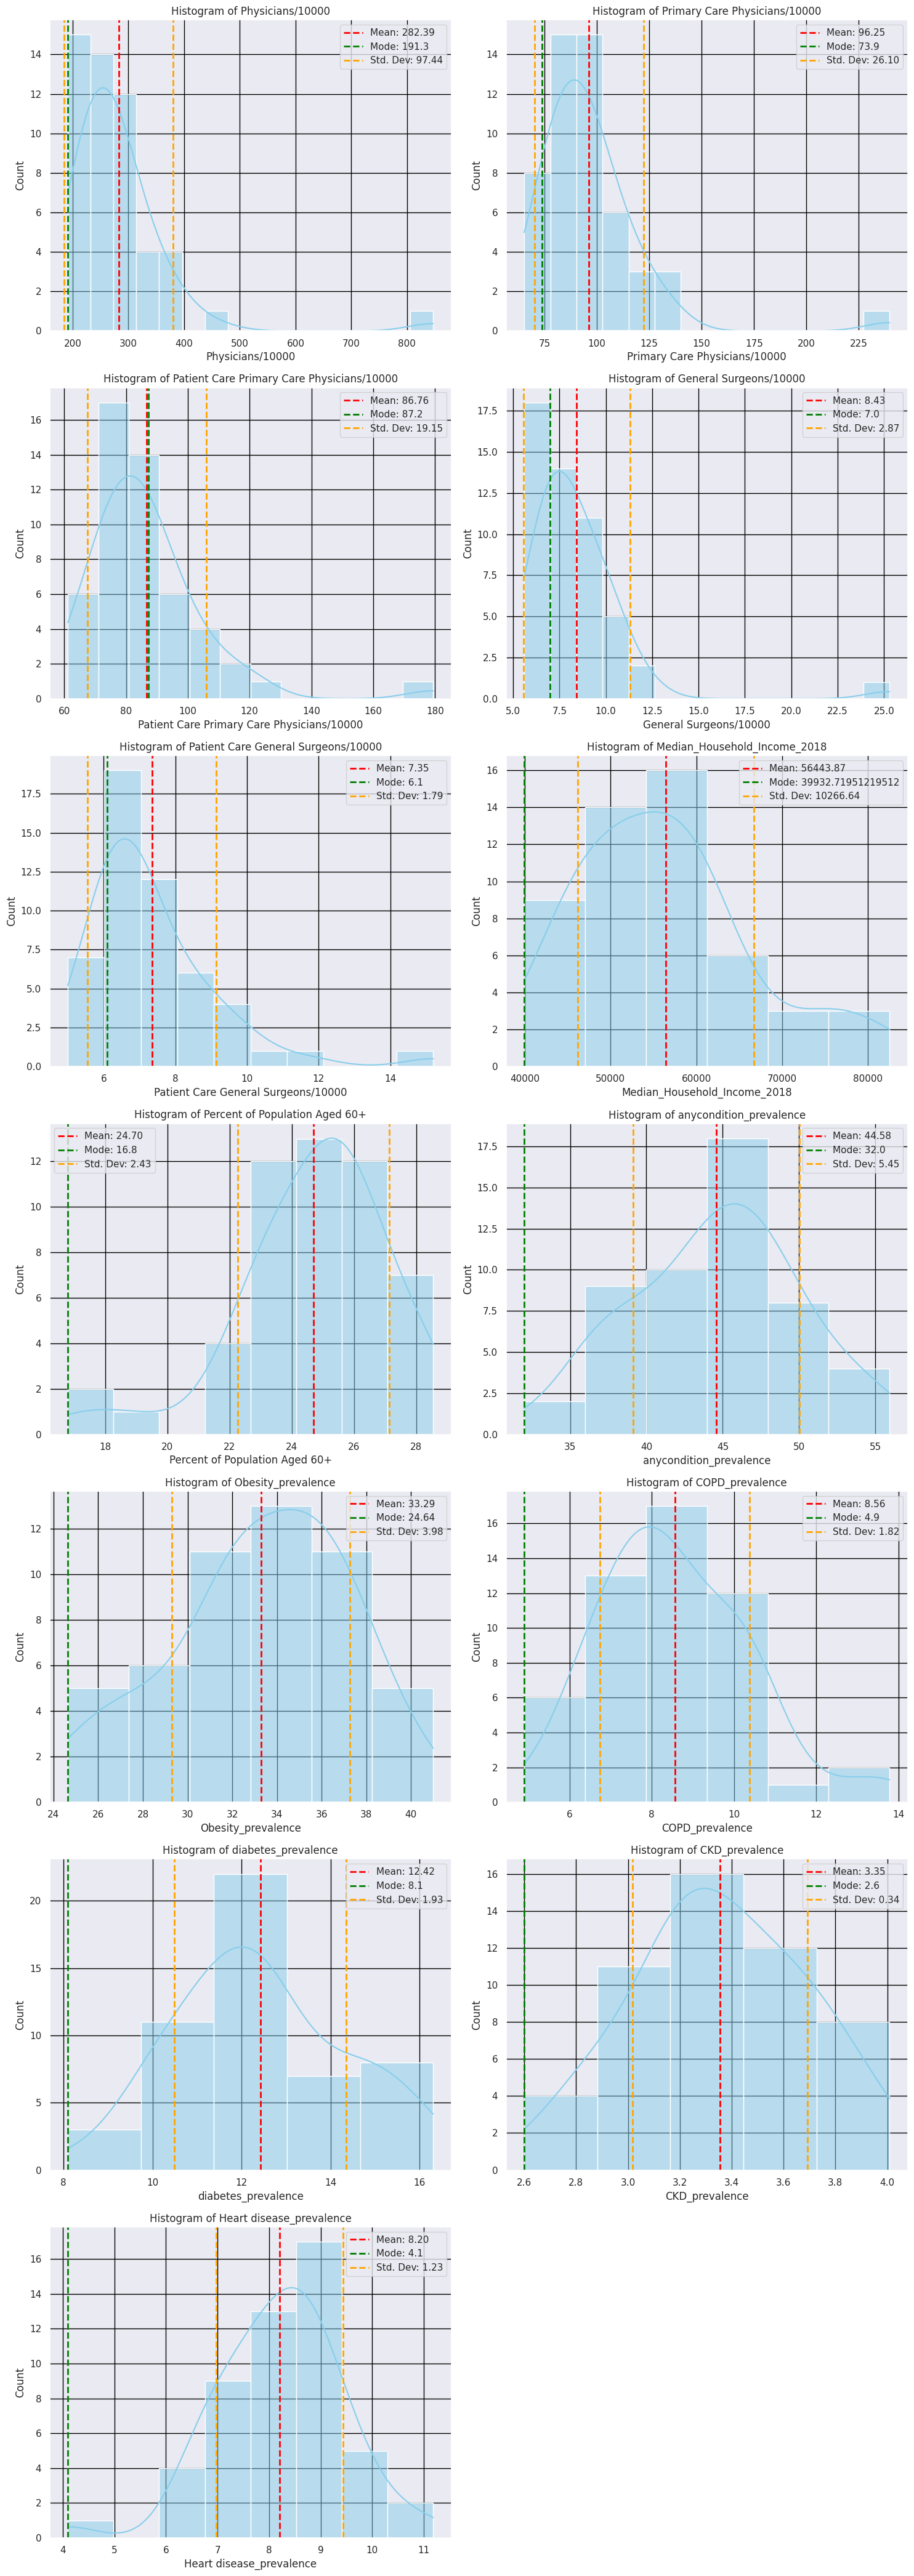

In [15]:
# List of column names
columns = df.columns

# Seaborn style configuration
sns.set(rc={'axes.facecolor': '#eaeaf2', 'grid.color': 'black'})

# Create subplots for each column with two columns
fig, axes = plt.subplots(nrows=len(columns)//2 + len(columns)%2, ncols=2, figsize=(15, 6 * (len(columns)//2 + len(columns)%2)))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Iterate over each column
for i, col in enumerate(columns):
    # Calculate mean, mode, and standard deviation
    mean = df[col].mean()
    mode = df[col].mode()  # There can be multiple modes; we take the first one
    deviation = df[col].std()

    # Use Freedman-Diaconis rule for bin width
    bin_width = 2 * (df[col].quantile(0.75) - df[col].quantile(0.25)) / (len(df[col]) ** (1/3))
    bins = int((max(df[col]) - min(df[col])) / bin_width)

    # Plot the histogram
    sns.histplot(df[col], bins=bins, kde=True, color='skyblue', ax=axes[i])

    # Vertical line for the mean
    axes[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

    # Vertical line for the mode
    axes[i].axvline(mode.iloc[0], color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode.iloc[0]}')

    # Vertical lines for standard deviation
    axes[i].axvline(mean + deviation, color='orange', linestyle='dashed', linewidth=2, label=f'Std. Dev: {deviation:.2f}')
    axes[i].axvline(mean - deviation, color='orange', linestyle='dashed', linewidth=2)

    axes[i].legend()
    axes[i].set_title(f'Histogram of {col}')

# Hide any empty subplots
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


